## MOVIE RATING PREDICTION WITH PYTHON - **Task 2**
**Author - Saru Pradhan**

##### **importing necessary libraries**

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import bottleneck as bn
print(bn.__version__)

1.3.5


In [14]:
movie_data = pd.read_csv("C:/Users/LEVEL51PC/Desktop/dsets/movies.csv", encoding="latin1")

In [16]:
movie_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [22]:
movie_data.head(7)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma


In [24]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [26]:
movie_data.shape

(15509, 10)

In [28]:
movie_data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [30]:
movie_data.nunique

<bound method DataFrame.nunique of                                      Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3                                 #Yaaram  (2019)  110 min  Comedy, Romance   
4                       ...And Once Again  (2010)  105 min            Drama   
...                                   ...     ...      ...              ...   
15504                 Zulm Ko Jala Doonga  (1988)      NaN           Action   
15505                               Zulmi  (1999)  129 min    Action, Drama   
15506                           Zulmi Raj  (2005)      NaN           Action   
15507                       Zulmi Shikari  (1988)      NaN           Action   
15508                        Zulm-O-Sitam  (1998)  130 min    Action, Drama   

       Rating Vo

In [32]:
movie_data['Genre'].unique()

array(['Drama', 'Drama, Musical', 'Comedy, Romance',
       'Comedy, Drama, Musical', 'Drama, Romance, War', 'Documentary',
       'Horror, Mystery, Thriller', 'Action, Crime, Thriller', 'Horror',
       'Horror, Romance, Thriller', 'Comedy, Drama, Romance', 'Thriller',
       'Comedy, Drama', nan, 'Comedy, Drama, Fantasy',
       'Comedy, Drama, Family', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Biography', 'Comedy, Horror', 'Action',
       'Drama, Horror, Mystery', 'Comedy', 'Action, Thriller',
       'Drama, History', 'Drama, History, Sport',
       'Horror, Mystery, Romance', 'Horror, Mystery',
       'Drama, Horror, Romance', 'Action, Drama, History',
       'Action, Drama, War', 'Comedy, Family',
       'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'War', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Drama, Romance', 'Adventure, Drama', 'Comedy, Mystery, Thriller',
       'Action, Crime, Dr

In [34]:
movie_data['Director'].unique()

array(['J.S. Randhawa', 'Gaurav Bakshi', 'Soumyajit Majumdar', ...,
       'Mozez Singh', 'Ved Prakash', 'Kiran Thej'], dtype=object)

In [36]:
movie_data['Year'].unique()

array([nan, '(2019)', '(2021)', '(2010)', '(1997)', '(2005)', '(2008)',
       '(2012)', '(2014)', '(2004)', '(2016)', '(1991)', '(1990)',
       '(2018)', '(1987)', '(1948)', '(1958)', '(2017)', '(2020)',
       '(2009)', '(2002)', '(1993)', '(1946)', '(1994)', '(2007)',
       '(2013)', '(2003)', '(1998)', '(1979)', '(1951)', '(1956)',
       '(1974)', '(2015)', '(2006)', '(1981)', '(1985)', '(2011)',
       '(2001)', '(1967)', '(1988)', '(1995)', '(1959)', '(1996)',
       '(1970)', '(1976)', '(2000)', '(1999)', '(1973)', '(1968)',
       '(1943)', '(1953)', '(1986)', '(1983)', '(1989)', '(1982)',
       '(1977)', '(1957)', '(1950)', '(1992)', '(1969)', '(1975)',
       '(1947)', '(1972)', '(1971)', '(1935)', '(1978)', '(1960)',
       '(1944)', '(1963)', '(1940)', '(1984)', '(1934)', '(1955)',
       '(1936)', '(1980)', '(1966)', '(1949)', '(1962)', '(1964)',
       '(1952)', '(1933)', '(1942)', '(1939)', '(1954)', '(1945)',
       '(1961)', '(1965)', '(1938)', '(1941)', '(1931)', 

In [38]:
movie_data['Year'].value_counts()

Year
(2019)    410
(2021)    392
(2018)    381
(2017)    360
(2005)    346
         ... 
(1917)      1
(1913)      1
(1926)      1
(1914)      1
(1924)      1
Name: count, Length: 102, dtype: int64

In [40]:
movie_data['Genre'].value_counts()

Genre
Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: count, Length: 485, dtype: int64

In [42]:
movie_data['Director'].value_counts()

Director
Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
                    ..
Naeem Siddiqui       1
Shadaab Khan         1
Mystelle Brabbee     1
Kunal Shivdasani     1
Kiran Thej           1
Name: count, Length: 5938, dtype: int64

In [44]:
movie_data['Duration'].value_counts()

Duration
120 min    240
135 min    173
130 min    171
140 min    167
150 min    154
          ... 
201 min      1
206 min      1
198 min      1
218 min      1
250 min      1
Name: count, Length: 182, dtype: int64

In [50]:
movie_data['Duration'].unique()

array([nan, '109 min', '90 min', '110 min', '105 min', '147 min',
       '142 min', '59 min', '82 min', '116 min', '96 min', '120 min',
       '161 min', '166 min', '102 min', '87 min', '132 min', '66 min',
       '146 min', '112 min', '168 min', '158 min', '126 min', '94 min',
       '138 min', '124 min', '144 min', '157 min', '136 min', '107 min',
       '113 min', '80 min', '122 min', '149 min', '148 min', '130 min',
       '121 min', '188 min', '115 min', '103 min', '114 min', '170 min',
       '100 min', '99 min', '140 min', '128 min', '93 min', '125 min',
       '145 min', '75 min', '111 min', '134 min', '85 min', '104 min',
       '92 min', '137 min', '127 min', '150 min', '119 min', '135 min',
       '86 min', '76 min', '70 min', '72 min', '151 min', '95 min',
       '52 min', '89 min', '143 min', '177 min', '117 min', '123 min',
       '154 min', '88 min', '175 min', '153 min', '78 min', '139 min',
       '133 min', '101 min', '180 min', '60 min', '46 min', '164 min',
       '

#### **data cleaning, preprocessing and visualizing**

In [55]:
print("Null values in each column:")
movie_data.isnull().sum()

Null values in each column:


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

##### data visualizing using heatmap

<Axes: >

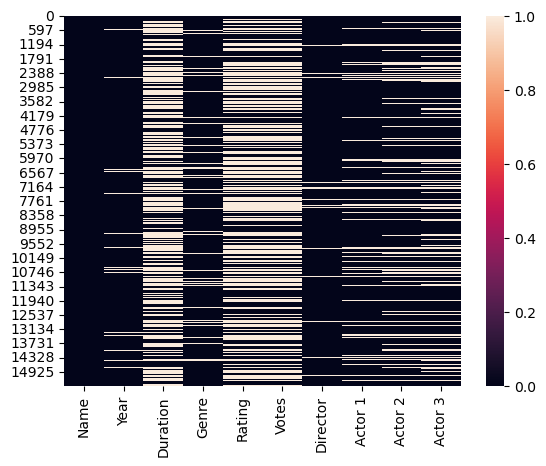

In [57]:
sns.heatmap(movie_data.isnull())

In [59]:
movie_data.dropna(subset=["Rating"], inplace = True)

In [61]:
print("Null values in each column:")
movie_data.isnull().sum()

Null values in each column:


Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

<Axes: >

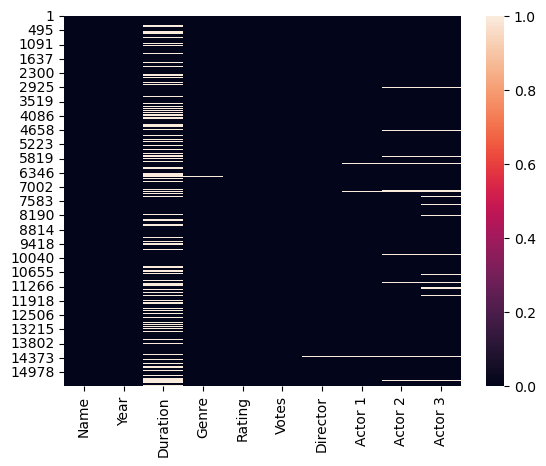

In [63]:
sns.heatmap(movie_data.isnull())

In [65]:
movie_data.dropna(subset=['Actor 1','Actor 2','Actor 3','Director','Genre'],inplace=True)

In [67]:
print("Null values in each column:")
movie_data.isnull().sum()

Null values in each column:


Name           0
Year           0
Duration    1899
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

<Axes: >

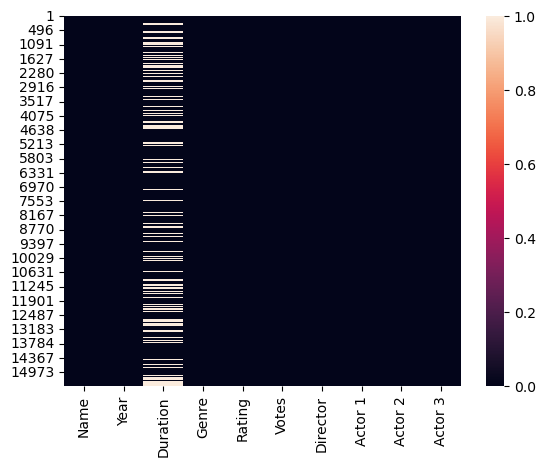

In [69]:
sns.heatmap(movie_data.isnull())

In [75]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


##### **VISULAZING THE PREPROCESSED DATA**

In [92]:
from collections import Counter   
#Imports the Counter class from the collections module, used for counting hashable objects.

In [98]:
genre_series = movie_data['Genre'].dropna().str.split(', ')

In [102]:
genre_list = [genre for sublist in genre_series for genre in sublist]
genre_counts = Counter(genre_list)

In [104]:
genre_counts = Counter(genre_list)

In [106]:
genre_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['Count'])

<Axes: >

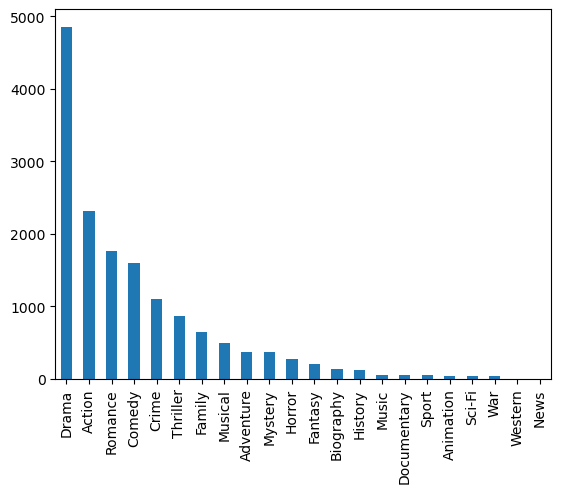

In [108]:
genre_df.sort_values(by='Count', ascending=False).plot(kind='bar', legend=False)

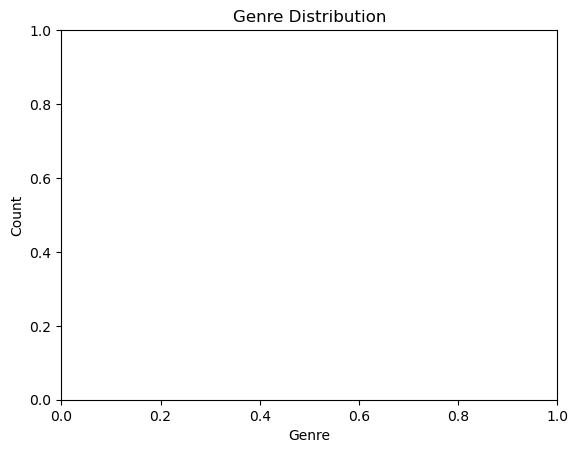

In [122]:
plt.ylabel("Count")
plt.xlabel("Genre")
plt.title("Genre Distribution")
plt.show()

In [127]:
genre_df = genre_series.explode()

In [129]:
genre_df = genre_df.reset_index().rename(columns={0: 'Genre'})
long_movie_data = movie_data[['Rating']].join(genre_df.set_index('index'))

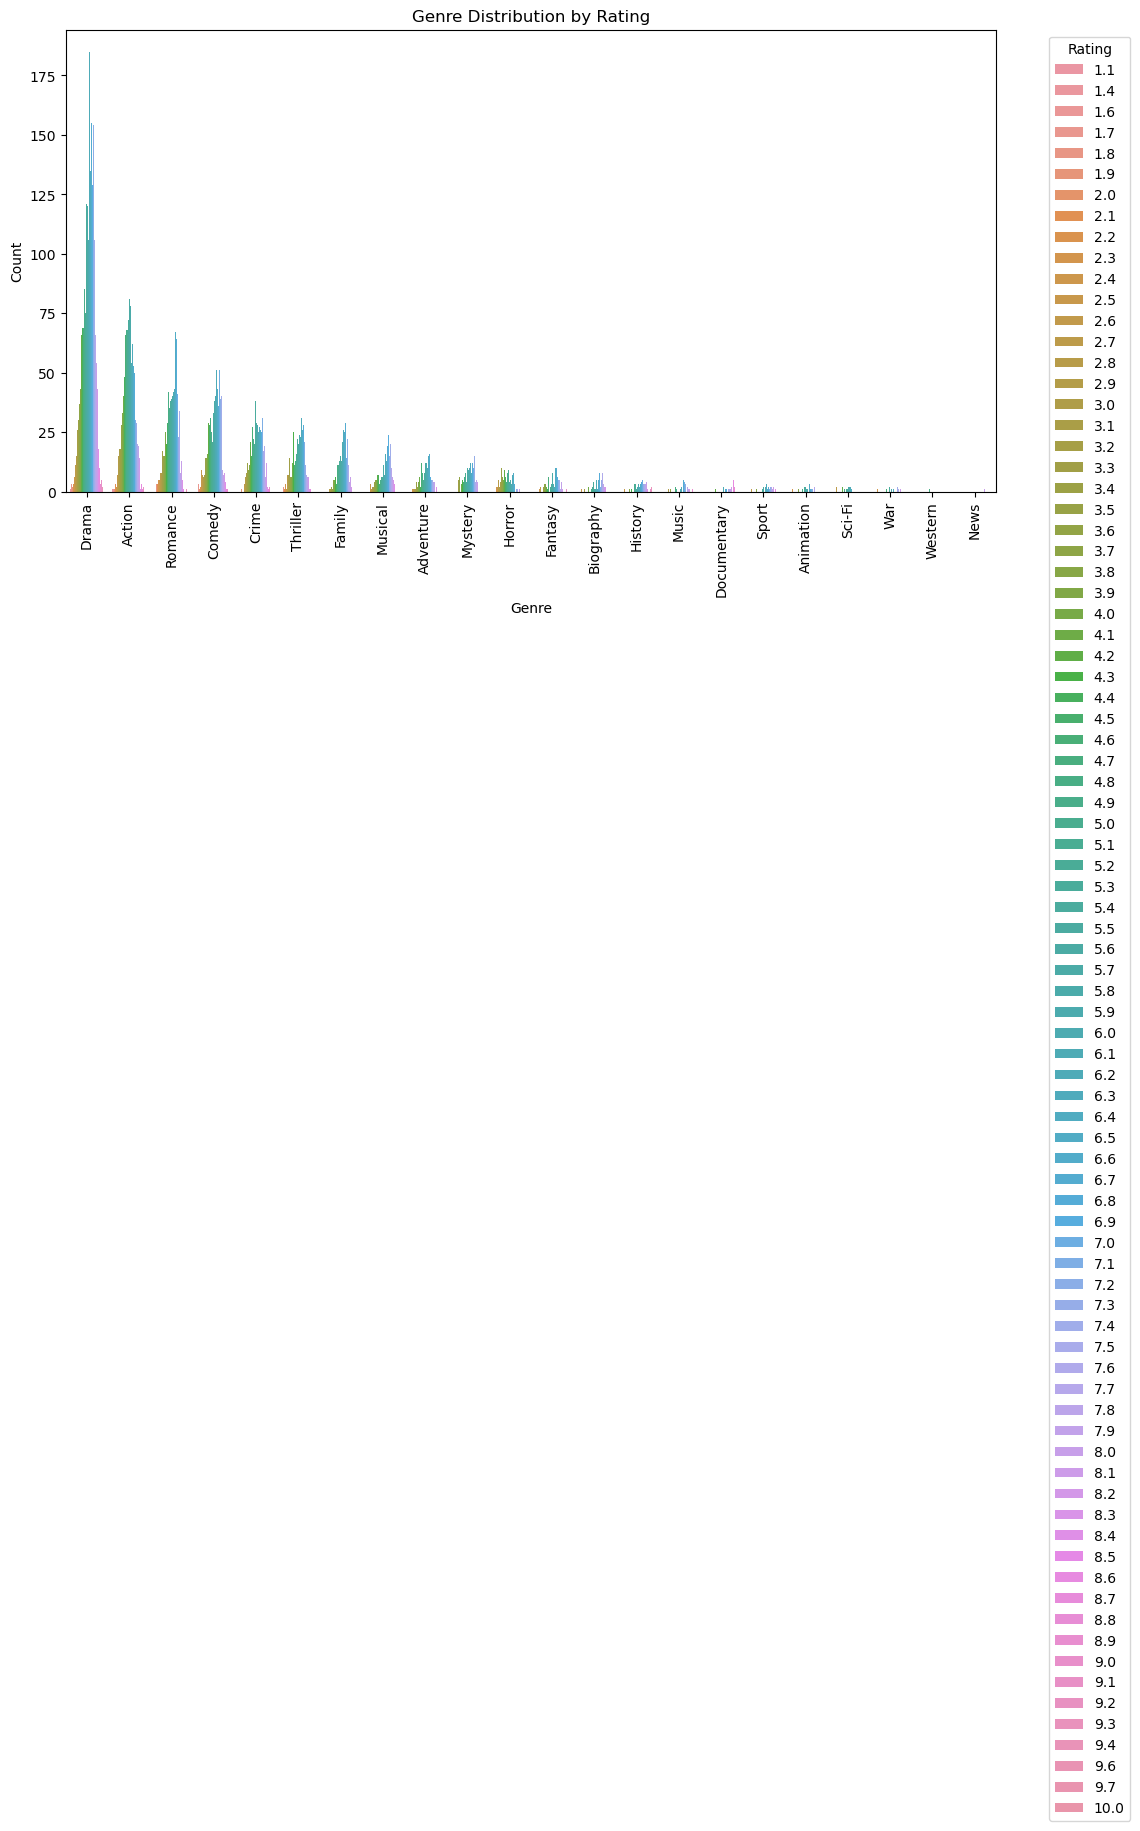

In [133]:
plt.figure(figsize=(12, 6))
sns.countplot(data=long_movie_data, x='Genre', hue='Rating', order=genre_df['Genre'].value_counts().index)
plt.ylabel("Count")
plt.xlabel("Genre")
plt.title("Genre Distribution by Rating")
plt.xticks(rotation=90)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

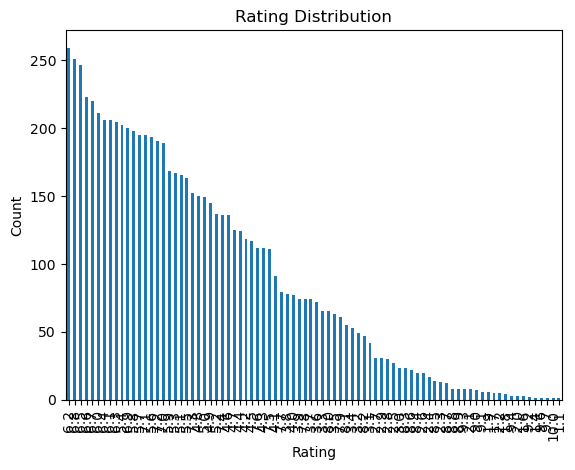

In [137]:
movie_data['Rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()

In [139]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   object 
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(1), object(9)
memory usage: 649.5+ KB


In [141]:
movie_data.isnull().sum()

Name           0
Year           0
Duration    1899
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [143]:
movie_data.duplicated().sum()

0

In [164]:

movie_data['Year'] = movie_data['Year'].astype(str).str.strip('()').astype(int)
print("\nDataFrame after cleaning and converting 'Year' column:")
print(movie_data)
#remove paranthesis and convert clean str to int


DataFrame after cleaning and converting 'Year' column:
                                     Name  Year Duration  \
1      #Gadhvi (He thought he was Gandhi)  2019  109 min   
3                                 #Yaaram  2019  110 min   
5                    ...Aur Pyaar Ho Gaya  1997  147 min   
6                               ...Yahaan  2005  142 min   
8                      ?: A Question Mark  2012   82 min   
...                                   ...   ...      ...   
15501                     Zulm Ki Hukumat  1992      NaN   
15503                     Zulm Ki Zanjeer  1989  125 min   
15504                 Zulm Ko Jala Doonga  1988      NaN   
15505                               Zulmi  1999  129 min   
15508                        Zulm-O-Sitam  1998  130 min   

                           Genre  Rating  Votes           Director  \
1                          Drama     7.0      8      Gaurav Bakshi   
3                Comedy, Romance     4.4     35         Ovais Khan   
5         Com

In [166]:
# Convert 'Votes' to numeric and replace the , to keep only numerical part
movie_data['Votes'] = movie_data['Votes'].str.replace(',','').astype(int)

In [168]:
# Remove the min word from 'Duration' column and convert all values to numeric
movie_data['Duration'] = movie_data['Duration'].str.strip('min')

In [178]:
movie_data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [180]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int32  
 2   Duration  7558 non-null   float64
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int32  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(2), int32(2), object(6)
memory usage: 590.5+ KB


In [182]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [184]:
movie_data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15501,Zulm Ki Hukumat,1992,135.0,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,1989,125.0,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,1988,135.0,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129.0,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,1998,130.0,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [186]:
movie_data.tail(7)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15494,Zubeidaa,2001,153.0,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15498,Zulm Ka Badla,1985,135.0,"Action, Crime, Drama",4.9,11,Chand,K. Prasad,Rakesh Roshan,Anita Raj
15501,Zulm Ki Hukumat,1992,135.0,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15503,Zulm Ki Zanjeer,1989,125.0,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,1988,135.0,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129.0,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,1998,130.0,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


#####  **finally data is cleaned and imputed**

In [190]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int32  
 2   Duration  7558 non-null   float64
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int32  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(2), int32(2), object(6)
memory usage: 590.5+ KB


In [192]:
movie_data.describe()

,Year,Duration,Rating,Votes
count,7558.000000,7558.000000,7558.000000,7558.000000
mean,1993.421011,133.831305,5.811127,2029.123842
std,20.004711,21.919300,1.368255,11868.695754
min,1917.000000,21.000000,1.100000,5.000000
25%,1980.000000,125.000000,4.900000,18.000000
50%,1996.000000,135.000000,6.000000,61.000000
75%,2011.000000,144.000000,6.800000,456.000000
max,2021.000000,321.000000,10.000000,591417.000000


**analysis**

In [198]:
# find top 5 movies based on rating
top_movie = movie_data.loc[movie_data['Rating'].sort_values(ascending=False)[:5].index]
top_movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94.0,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021,79.0,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,2020,135.0,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
14222,The Reluctant Crime,2020,113.0,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5077,Gho Gho Rani,2019,105.0,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar


###### **Distribution of Top 5 movies wrt Year**

C:\Users\LEVEL51PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LEVEL51PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\LEVEL51PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\LEVEL51PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When gro

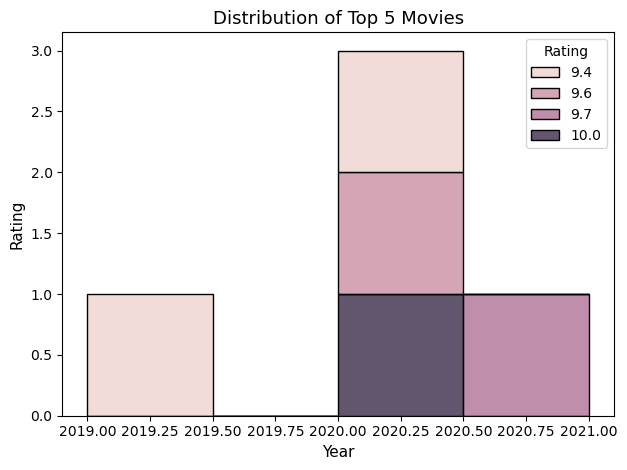

In [212]:
sns.histplot(data=top_movie, x="Year",hue="Rating", multiple="stack")
plt.title('Distribution of Top 5 Movies', fontsize=13)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Rating', fontsize=11)
plt.tight_layout()
plt.show()

###### **Distribution of Genre of movies**


In [217]:
genre_counts = movie_data['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Select the top N genres (e.g., top 5)
top_n_genres = genre_counts.head(5)
top_n_genres

,Genre,Count
0,Drama,1137
1,"Drama, Romance",443
2,"Action, Crime, Drama",417
3,Action,391
4,"Drama, Family",291


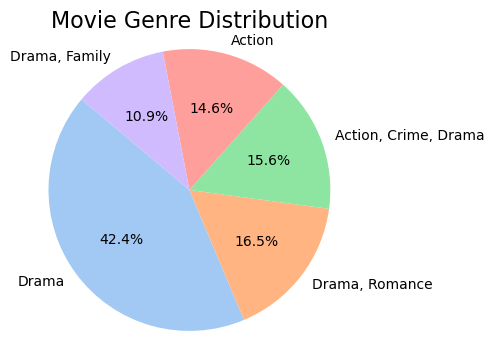

In [219]:
plt.figure(figsize=(4, 4))
plt.pie(top_n_genres['Count'], labels=top_n_genres['Genre'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Movie Genre Distribution', fontsize=16)
plt.axis('equal')
plt.show()

###### **Distribution of Top directors by average rating**

In [224]:
# Group the data by director and calculate the average rating
director_avg_rating = movie_data.groupby('Director')['Rating'].mean().reset_index()
director_avg_rating = director_avg_rating.sort_values(by='Rating', ascending=False)
top_directors = director_avg_rating.head(10)
top_directors

,Director,Rating
2243,Saif Ali Sayeed,10.0
2560,Sriram Raja,9.7
504,Bobby Kumar,9.6
322,Arvind Pratap,9.4
1513,Munni Pankaj,9.4
2598,Suhrud Godbole,9.4
1601,Nikhil Mahar,9.3
2809,Venkatesh Bk,9.3
1879,Rahul Mallick,9.3
1864,Raghav Jairath,9.3


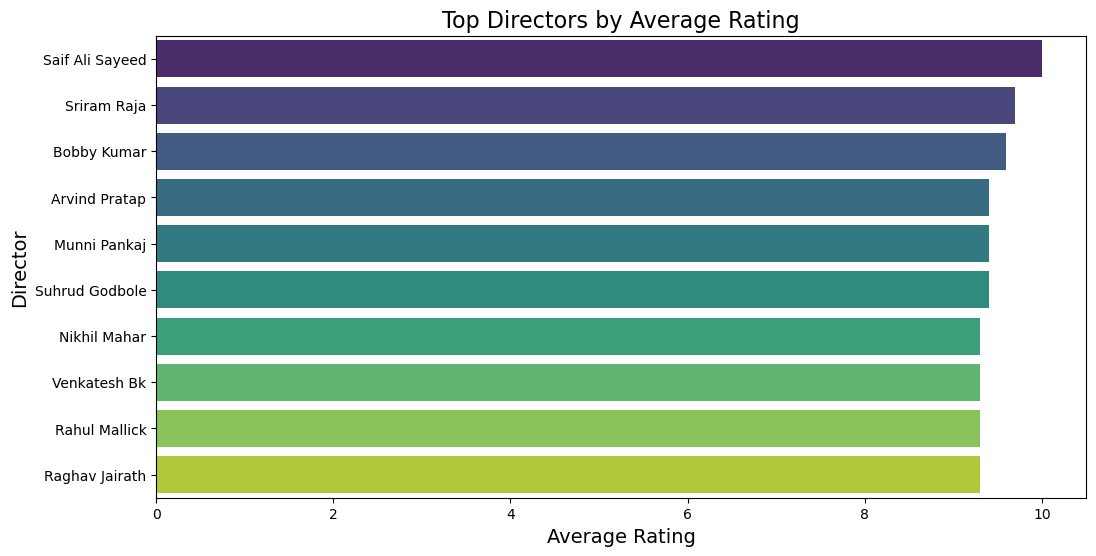

In [226]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_directors, x='Rating', y='Director', palette='viridis')
plt.title('Top Directors by Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Director', fontsize=14)
plt.show()

###### **Distribution of top actors by number of movie**

In [229]:
actor_counts = movie_data['Actor 1'].value_counts().reset_index()
actor_counts.columns = ['Actor', 'MovieCount']
top_n_actors = actor_counts.head(10)
top_n_actors

,Actor,MovieCount
0,Jeetendra,140
1,Dharmendra,134
2,Mithun Chakraborty,130
3,Ashok Kumar,125
4,Rajesh Khanna,118
5,Amitabh Bachchan,116
6,Dev Anand,90
7,Shashi Kapoor,88
8,Akshay Kumar,82
9,Sanjay Dutt,73


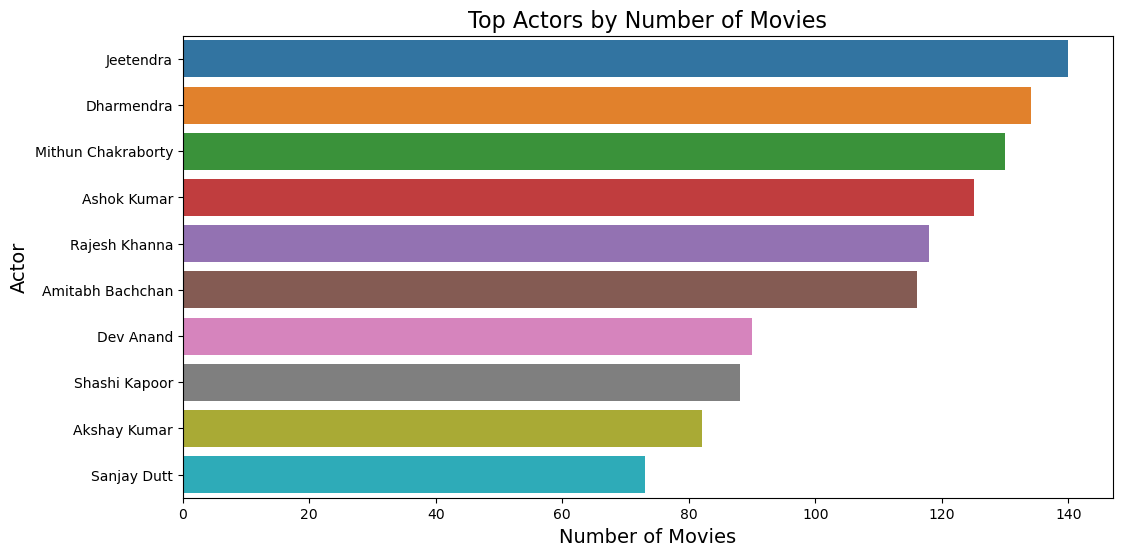

In [231]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_n_actors, x='MovieCount', y='Actor', orient='h')
plt.title('Top Actors by Number of Movies', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Actor', fontsize=14)
plt.show()

###### **Relationship between the number of genre and movie ratings**

C:\Users\LEVEL51PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LEVEL51PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


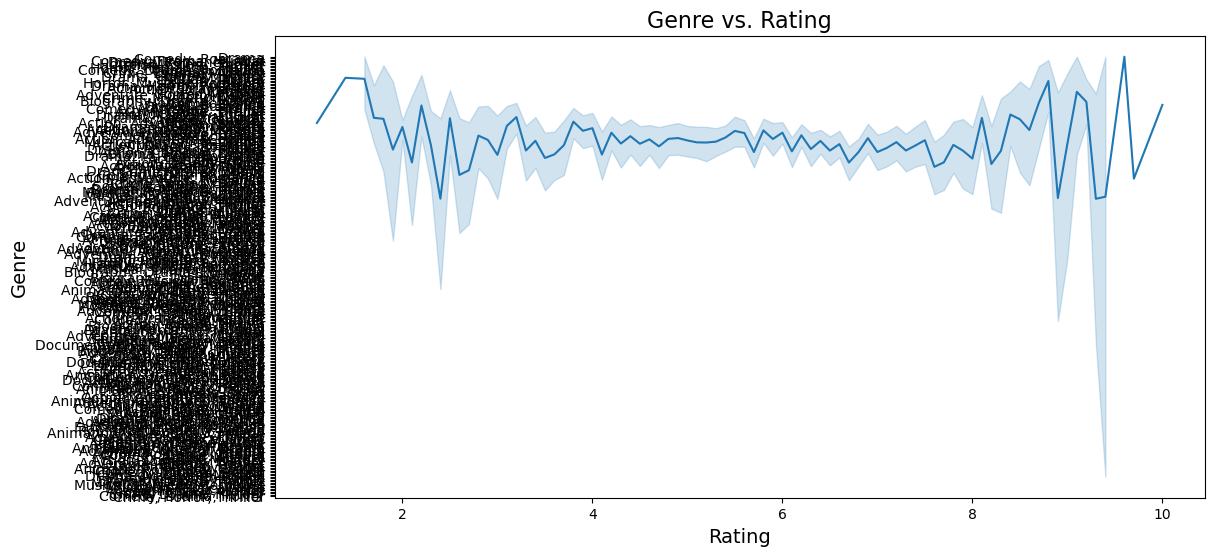

In [242]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=movie_data, x='Rating', y='Genre')
plt.title('Genre vs. Rating', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.show()

###### **Relationship between the number of voting and movie ratings**

C:\Users\LEVEL51PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LEVEL51PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


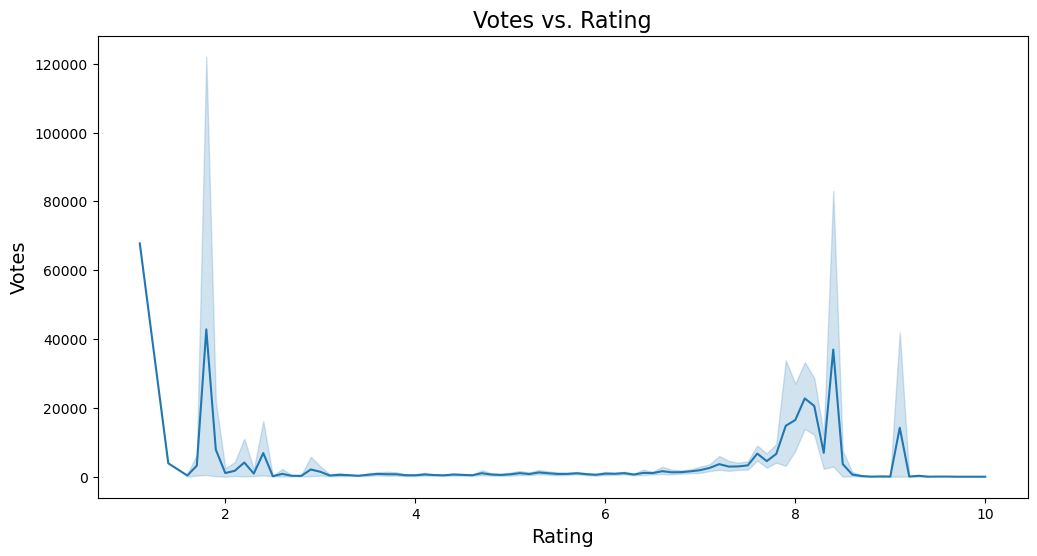

In [245]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=movie_data, x='Rating', y='Votes')
plt.title('Votes vs. Rating', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Votes', fontsize=14)
plt.show()

###### **Distribution of number of movie released every year**

In [248]:
yearly_movie_counts = movie_data['Year'].value_counts().reset_index()
yearly_movie_counts.columns = ['Year', 'MovieCount']
yearly_movie_counts = yearly_movie_counts.sort_values(by='Year')
yearly_movie_counts

,Year,MovieCount
91,1917,1
88,1931,3
89,1932,2
86,1933,4
90,1934,2
...,...,...
1,2017,223
2,2018,214
0,2019,238
9,2020,157


C:\Users\LEVEL51PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LEVEL51PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


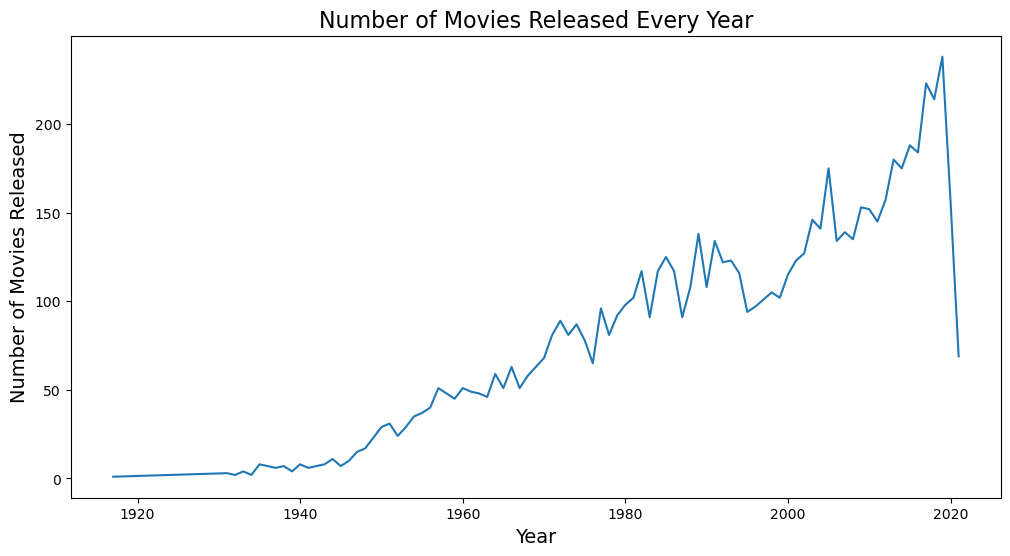

In [250]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_movie_counts, x='Year', y='MovieCount')
plt.title('Number of Movies Released Every Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies Released', fontsize=14)
plt.show()

###### **Distribution of Movies with rating greater than 5 and votes greater than 10000**

In [278]:
filtered_df = movie_data[(movie_data['Rating'] > 8) & (movie_data['Votes'] > 86000)]
filtered_df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
75,3 Idiots,2009,170.0,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
3410,Dangal,2016,161.0,"Action, Biography, Drama",8.4,165074,Nitesh Tiwari,Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh
4902,Gangs of Wasseypur,2012,321.0,"Action, Comedy, Crime",8.2,86355,Anurag Kashyap,Manoj Bajpayee,Richa Chadha,Nawazuddin Siddiqui
8035,Lagaan: Once Upon a Time in India,2001,224.0,"Drama, Musical, Sport",8.1,107234,Ashutosh Gowariker,Aamir Khan,Raghuvir Yadav,Gracy Singh
8228,Like Stars on Earth,2007,165.0,"Drama, Family",8.4,175810,Aamir Khan,Amole Gupte,Darsheel Safary,Aamir Khan
10882,PK,2014,153.0,"Comedy, Drama, Musical",8.1,168150,Rajkumar Hirani,Aamir Khan,Anushka Sharma,Sanjay Dutt
11725,Rang De Basanti,2006,167.0,"Comedy, Crime, Drama",8.1,114446,Rakeysh Omprakash Mehra,Aamir Khan,Soha Ali Khan,Siddharth


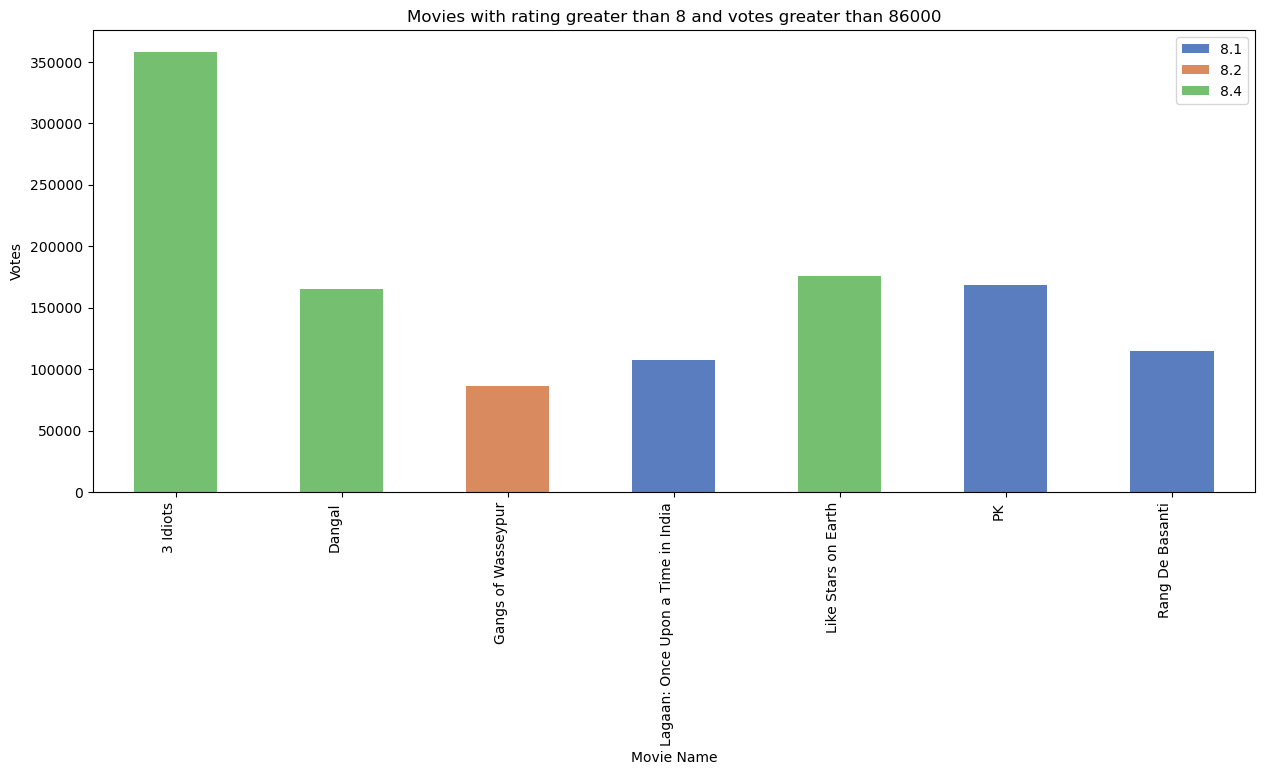

In [280]:
plt.figure(figsize=(15, 6))
ax=sns.barplot(data=filtered_df,x='Name',y='Votes',hue='Rating',dodge=False,width=0.5,palette='muted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.legend(loc='upper right')
ax.set_xlabel('Movie Name')
ax.set_ylabel('Votes')
ax.set_title('Movies with rating greater than 8 and votes greater than 86000')
plt.show()

###### **Distribution of Number of movies each genre**

In [283]:
movie_data['Genre'] = movie_data['Genre'].str.split(',')
# Creating  new DataFrame with one row for each genre
genre_df = movie_data.explode('Genre')
genre_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110.0,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,135.0,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129.0,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,1999,129.0,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,1998,130.0,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


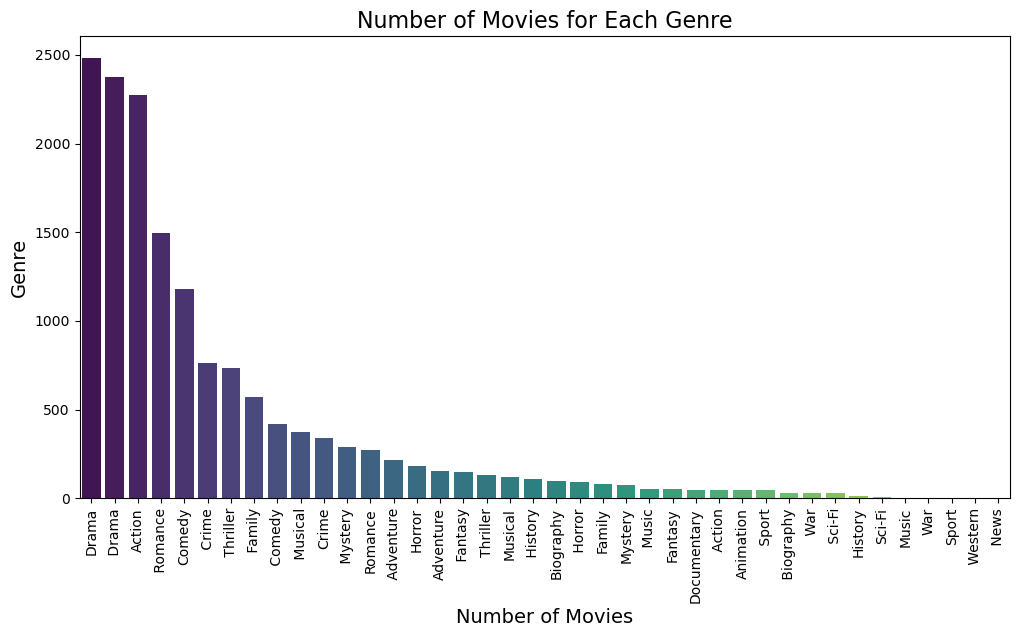

In [285]:
plt.figure(figsize=(12, 6))
sns.countplot(data=genre_df, x='Genre', order=genre_df['Genre'].value_counts().index, palette='viridis')
plt.title('Number of Movies for Each Genre', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.xticks(rotation=90)
plt.show()

###### **Distribution of Average rating of movies in each genre**

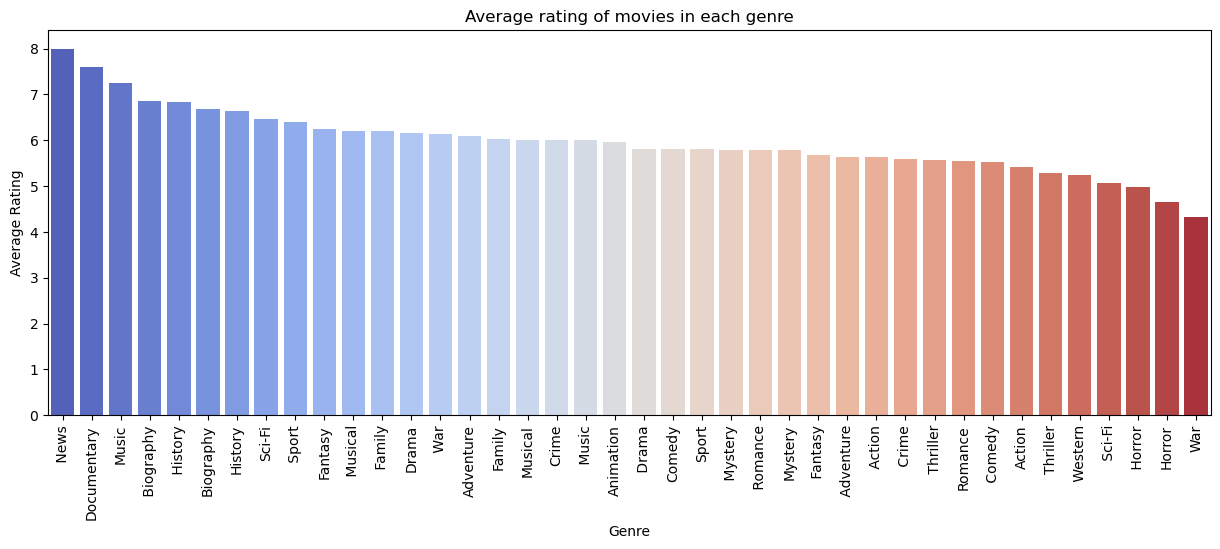

In [288]:
average_rating_by_genre = genre_df.groupby('Genre')['Rating'].mean().reset_index()
average_rating_by_genre = average_rating_by_genre.sort_values(by='Rating', ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(data=average_rating_by_genre,y="Rating",x='Genre',palette='coolwarm')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average rating of movies in each genre')
plt.xticks(rotation=90)
plt.show()

### **Featured Engineering**

*It include handling missing values, encoding categorical variables, Feature Scaling i.e. Standardization, Normalization, Feature Creation, extraction etc.*

In [349]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# dropping name because it doesn't impact the outcome
trans_data = movie_data.drop(['Name'],axis=1)
# Transform Director columns
trans_data['Director'] = labelencoder.fit_transform(movie_data['Director'])
# Transform Actors Columns
trans_data['Actor 1'] = labelencoder.fit_transform(movie_data['Actor 1'])
trans_data['Actor 2'] = labelencoder.fit_transform(movie_data['Actor 2'])
trans_data['Actor 3'] = labelencoder.fit_transform(movie_data['Actor 3'])
trans_data['Genre'] = labelencoder.fit_transform(movie_data['Genre'].apply(lambda x: ', '.join(x)))
trans_data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109.0,252,7.0,8,755,1686,2725,373
3,2019,110.0,205,4.4,35,1637,1500,865,2543
5,1997,147.0,175,4.7,827,1881,481,84,2422
6,2005,142.0,315,7.4,1086,2486,878,1346,2996
8,2012,82.0,351,5.6,326,161,2385,1416,1189


### **OR**

In [308]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoders
labelencoder_director = LabelEncoder()
labelencoder_actor = LabelEncoder()
labelencoder_genre = LabelEncoder()

# Prepare the transformed DataFrame
trans_data = movie_data.drop(['Name'], axis=1)

# Transform Director column
trans_data['Director'] = labelencoder_director.fit_transform(movie_data['Director'])

# Transform Actors Columns
trans_data['Actor 1'] = labelencoder_actor.fit_transform(movie_data['Actor 1'])
trans_data['Actor 2'] = labelencoder_actor.fit_transform(movie_data['Actor 2'])
trans_data['Actor 3'] = labelencoder_actor.fit_transform(movie_data['Actor 3'])

# If 'Genre' is a list of genres, join them into a single string for encoding
if isinstance(movie_data['Genre'].iloc[0], list):
    trans_data['Genre'] = labelencoder_genre.fit_transform(movie_data['Genre'].apply(lambda x: ', '.join(x)))
else:
    trans_data['Genre'] = labelencoder_genre.fit_transform(movie_data['Genre'])

trans_data.head()


,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109.0,252,7.0,8,755,1686,2725,373
3,2019,110.0,205,4.4,35,1637,1500,865,2543
5,1997,147.0,175,4.7,827,1881,481,84,2422
6,2005,142.0,315,7.4,1086,2486,878,1346,2996
8,2012,82.0,351,5.6,326,161,2385,1416,1189


In [312]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
sc_data = scaler.fit_transform(trans_data)
sc_df = pd.DataFrame(sc_data,columns=trans_data.columns)

sc_df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.980769,0.293333,0.607229,0.662921,0.000005,0.255499,0.698426,0.979511,0.123102
1,0.980769,0.296667,0.493976,0.370787,0.000051,0.553976,0.621375,0.310927,0.839274
2,0.769231,0.420000,0.421687,0.404494,0.001390,0.636548,0.199254,0.030194,0.799340
3,0.846154,0.403333,0.759036,0.707865,0.001828,0.841286,0.363712,0.483825,0.988779
4,0.913462,0.203333,0.845783,0.505618,0.000543,0.054484,0.987987,0.508986,0.392409


**Examining the correlation of data helps to understand the relationships between different features and identify which variables might be useful for predictive modeling.**

In [318]:
# Calculate the correlation matrix
corr_df = trans_data.corr(numeric_only=True)
# Sort correlations of the 'Rating' column
rating_correlation = corr_df['Rating'].sort_values(ascending=False)
# Display the sorted correlations
print(rating_correlation)

Rating      1.000000
Votes       0.134655
Genre       0.122565
Actor 2     0.038852
Actor 3     0.031550
Actor 1     0.025089
Duration   -0.001801
Director   -0.003678
Year       -0.194990
Name: Rating, dtype: float64


**Thus, Votes has the highest positive correlation with Rating.**
**Year has a very low (and possibly negative) correlation with Rating.**

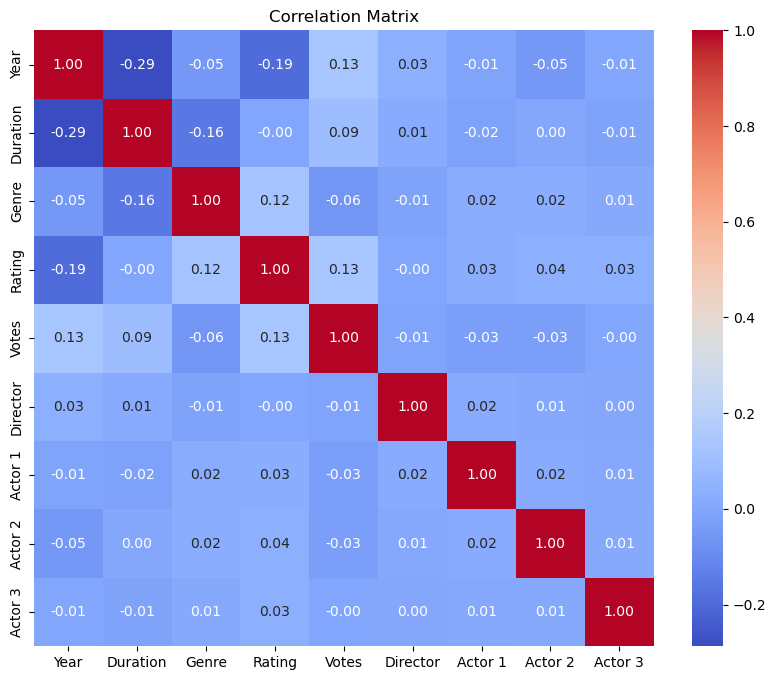

In [323]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [328]:
# Display correlations for a specific feature
feature = 'Duration'
print(corr_df[feature])

Year       -0.287114
Duration    1.000000
Genre      -0.155997
Rating     -0.001801
Votes       0.094108
Director    0.014915
Actor 1    -0.020383
Actor 2     0.002405
Actor 3    -0.011367
Name: Duration, dtype: float64


C:\Users\LEVEL51PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LEVEL51PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LEVEL51PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LEVEL51PC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


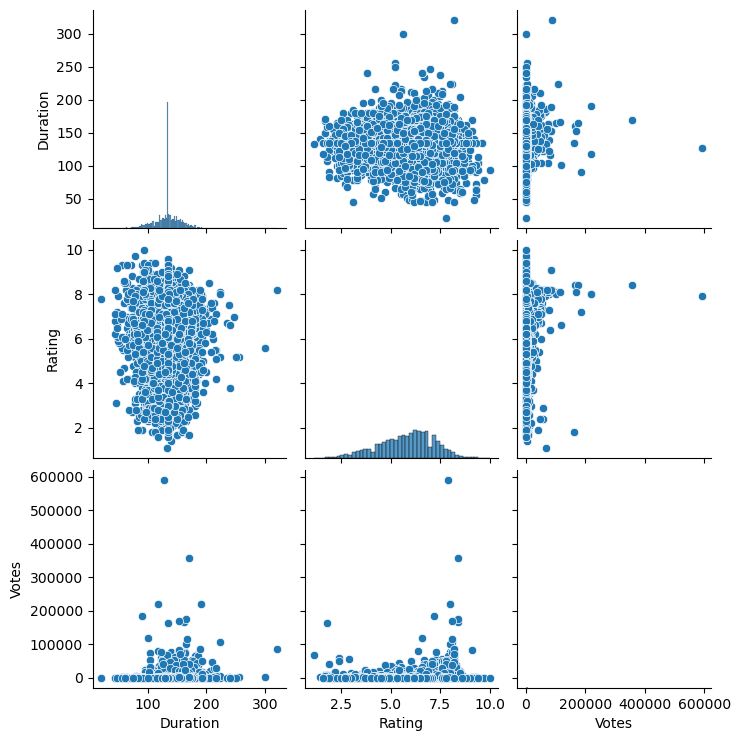

In [332]:
# Pair plot for selected features
sns.pairplot(movie_data[['Duration', 'Rating', 'Votes']])
plt.show()

**Now our transformed columns are much correlated with the target variable so we are ready to go**

## **Model Building**

**1. Split the Data**

In [344]:
from sklearn.model_selection import train_test_split
# put data except Rating data
X = trans_data.drop(['Rating'],axis=1)
# Put only Rating data
y = trans_data['Rating']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

**2. Selecting Linear Regression as model for training**

In [347]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [351]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [353]:
X_test = np.array(X_test)

In [357]:
y_pred = model.predict(X_test)
y_pred

C:\Users\LEVEL51PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.38173569, 6.27438422, 6.24148256, ..., 5.6990634 , 6.25823896,
       6.09526622])

In [413]:
print('The performance evaluation of Linear Regression is below: ', '\n')
print('R2 score: ',r2_score(y_test,y_pred))
print('Mean squared error: ',mean_squared_error(y_test,y_pred))
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))

The performance evaluation of Linear Regression is below:  

R2 score:  0.08483347672034758
Mean squared error:  1.6972873264362007
Mean absolute error:  1.0286370452288058


In [361]:
from sklearn.model_selection import cross_val_score

In [363]:
# Initialize the model
model = LinearRegression()

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation

print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')

Cross-validation scores: [0.09765657 0.10291946 0.031372   0.09157809 0.05781693]
Average cross-validation score: 0.07626861102812321


**RandomForest**

In [389]:
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor()


scores = cross_val_score(model1, X, y, cv=5)
print(f'RandomForestRegressor Cross-validation scores: {scores}')
print(f'Average score: {scores.mean()}')


RandomForestRegressor Cross-validation scores: [0.36156573 0.34015139 0.33341701 0.35301759 0.32360218]
Average score: 0.3423507779000744


In [395]:
# put data except Rating data
X1 = trans_data.drop(['Rating'],axis=1)
# Put only Rating data
y1 = trans_data['Rating']
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.3,random_state=42)
model1.fit(X1_train, y1_train)

RandomForestRegressor()

**Feature Importance Analysis:**

In [397]:
X1_test = np.array(X1_test)

In [399]:
y1_pred = model1.predict(X1_test)
y1_pred

C:\Users\LEVEL51PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([7.567, 6.232, 6.116, ..., 5.63 , 5.31 , 7.846])

In [415]:
print('The performance evaluation of RandomForestRegressor is below: ', '\n')
print('R2 score: ',r2_score(y1_test,y1_pred))
print('Mean squared error: ',mean_squared_error(y1_test,y1_pred))
print('Mean absolute error: ',mean_absolute_error(y1_test,y1_pred))

The performance evaluation of RandomForestRegressor is below:  

R2 score:  0.32800711856933573
Mean squared error:  1.246292310846561
Mean absolute error:  0.8489369488536156


In [403]:
importances = model1.feature_importances_
feature_names = X1.columns
# Create a DataFrame to visualize feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

    Feature  Importance
3     Votes    0.228806
0      Year    0.207423
2     Genre    0.125447
5   Actor 1    0.093602
6   Actor 2    0.089083
7   Actor 3    0.088204
4  Director    0.084730
1  Duration    0.082706


**Thus, Votes and Year are the most influential features in predicting movie ratings.
Genre and Actor 1 are also significant but have less impact compared to Votes and Year.
Director and Duration have the least impact but still contribute to the model.**

In [405]:
print(y_test)

6241     7.4
3321     4.9
6117     6.5
5975     5.7
6653     7.0
        ... 
14566    3.5
10966    5.2
10168    2.7
14796    4.9
2785     8.0
Name: Rating, Length: 2268, dtype: float64


In [419]:
model.predict(X_test)

C:\Users\LEVEL51PC\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([7.472, 6.048, 6.135, ..., 5.406, 5.313, 7.843])

In [421]:
X.head(5)

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109.0,252,8,755,1686,2725,373
3,2019,110.0,205,35,1637,1500,865,2543
5,1997,147.0,175,827,1881,481,84,2422
6,2005,142.0,315,1086,2486,878,1346,2996
8,2012,82.0,351,326,161,2385,1416,1189


In [425]:
y.head(5)

1    7.0
3    4.4
5    4.7
6    7.4
8    5.6
Name: Rating, dtype: float64

In [437]:
# Create a new dataframe for testing
data = {
    'Year': [2019],
    'Duration': [111],
    'Genre': [5.8],
    'Votes': [36],
    'Director': [4.5],
    'Actor 1': [5.3],
    'Actor 2': [4.5],
    'Actor 3': [4.5]
}
trail = pd.DataFrame(data)
# Make sure to use the same columns that were used to train the models
trail = trail[[
    'Year', 'Duration', 'Genre', 'Votes', 'Director', 
    'Actor 1', 'Actor 2', 'Actor 3'
]]


In [439]:
# Evaluate the Linear Regression model
predicted_rating_linear = model.predict(trail)
print("Predicted Rating (Linear Regression):", predicted_rating_linear)

Predicted Rating (Linear Regression): [6.265]


In [441]:
# Predict using the Random Forest Regressor model
predicted_rating_rf = model1.predict(trail)
print("Predicted Rating (Random Forest):", predicted_rating_rf)

Predicted Rating (Random Forest): [5.988]


**evaluating model for another datafram**

In [443]:
# Create a new dataframe for testing
data = {
    'Year': [2002],
    'Duration': [111],
    'Genre': [5.8],
    'Votes': [100],
    'Director': [4.5],
    'Actor 1': [5.3],
    'Actor 2': [4.5],
    'Actor 3': [4.5]
}
trail = pd.DataFrame(data)
# Make sure to use the same columns that were used to train the models
trail = trail[[
    'Year', 'Duration', 'Genre', 'Votes', 'Director', 
    'Actor 1', 'Actor 2', 'Actor 3'
]]

In [445]:
# Evaluate the Linear Regression model
predicted_rating_linear = model.predict(trail)
print("Predicted Rating (Linear Regression):", predicted_rating_linear)

Predicted Rating (Linear Regression): [4.804]


In [447]:
# Predict using the Random Forest Regressor model
predicted_rating_rf = model1.predict(trail)
print("Predicted Rating (Random Forest):", predicted_rating_rf)

Predicted Rating (Random Forest): [4.636]
